In [1]:
# Nasim Bahadur
# Id: 2018-1-60-073

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("Dataset/kmeans-data.csv")
data.head(10)

,x,y
0,1,2
1,7,0
2,2,1
3,0,8
4,9,1
5,3,6
6,5,0
7,8,0
8,6,7
9,4,3


Text(0, 0.5, 'y')

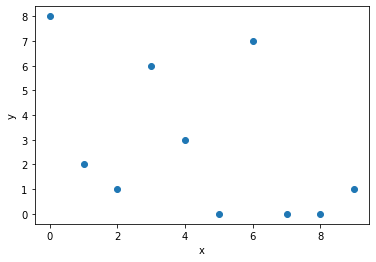

In [4]:
plt.scatter(data.x,data['y'])
plt.xlabel('x')
plt.ylabel('y')

In [5]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(data[['x','y']])
y_predicted

array([0, 1, 0, 4, 1, 2, 3, 1, 2, 3], dtype=int32)

In [6]:
data['cluster']=y_predicted
data.head()

,x,y,cluster
0,1,2,0
1,7,0,1
2,2,1,0
3,0,8,4
4,9,1,1


In [7]:
km.cluster_centers_

array([[1.5       , 1.5       ],
       [8.        , 0.33333333],
       [4.5       , 6.5       ],
       [4.5       , 1.5       ],
       [0.        , 8.        ]])

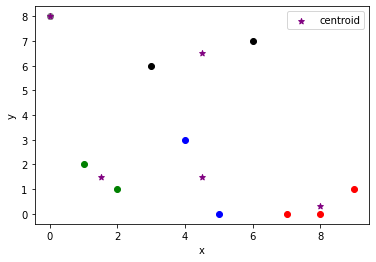

In [8]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]
data4 = data[data.cluster==3]
data5 = data[data.cluster==4]
plt.scatter(data1.x,data1['y'],color='green')
plt.scatter(data2.x,data2['y'],color='red')
plt.scatter(data3.x,data3['y'],color='black')
plt.scatter(data4.x,data4['y'],color='blue')
plt.scatter(data5.x,data5['y'],color='gray')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [9]:
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(data[['x','y']])
    sse.append(km.inertia_)
sse

[168.1,
 74.33333333333333,
 36.166666666666664,
 21.166666666666668,
 13.666666666666666,
 8.666666666666668,
 3.6666666666666665,
 1.5,
 0.5]

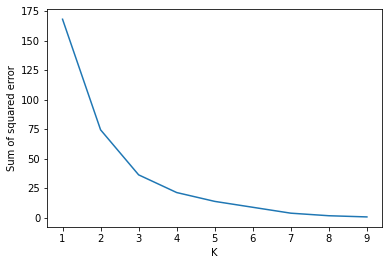

In [10]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)